## **Muestreo y la transformada de Fourier discreta**

### **Referencias Bibliograficas:** Voelz, D. G. (2011). Computational Fourier Optics: a MATLAB tutorial. Bellingham: Spie Press.

In [ ]:
# LIBRERIAS
import matplotlib
import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import cmath as cm


%matplotlib inline 
plt.rcParams['figure.figsize'] = 26, 12 # para modificar el tamaño de la figura
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 24}

matplotlib.rc('font', **font)

Para los siguientes ejemplos usaremos las funciones:

$$ f(x) = \exp(-(t)^2) $$
$$ g(x) = rect(x) $$

donde $x$ es la variable espacial. Veamos las graficas que se asumen como continuas

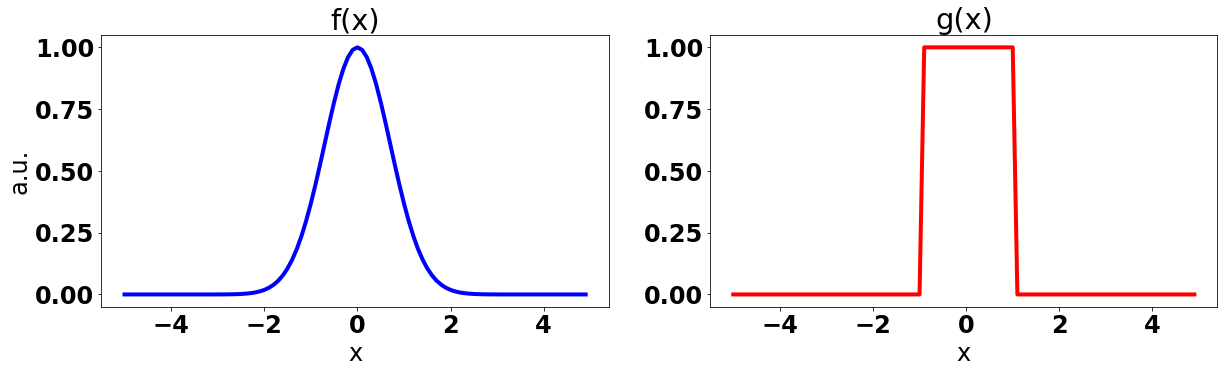

In [ ]:
dx=0.1
x = np.arange(-5,5,dx) # rango de visualización
f = np.exp(-(x)**2) # función de prueba

g = np.zeros(x.size)
for cont in range(len(x)):
    if abs(x[cont]) < 1:
        g[cont] = 1.
    else:
        g[cont] = 0.

font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 20, 5 # para modificar el tamaño de la figura
fig1 = plt.figure(1)
ax1 = plt.subplot(1,2,1)
ax1.plot(x,f,lw=4,color='b')
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('a.u.')

ax2 = plt.subplot(1,2,2)
ax2.plot(x,g,lw=4,color='r')
plt.title('g(x)')
plt.xlabel('x')
plt.show()

### **Muestreo uniforme, coordenadas, indices, centrado y desplazamiento**



*   Muestreo uniforme: $M=N$; $L_x=L_y$; $\Delta x=\Delta y$

[-2.5  -2.25 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25
  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25]
Con estos parametros el valor de la frecuencia de Nyquist es 2.00 1/m 


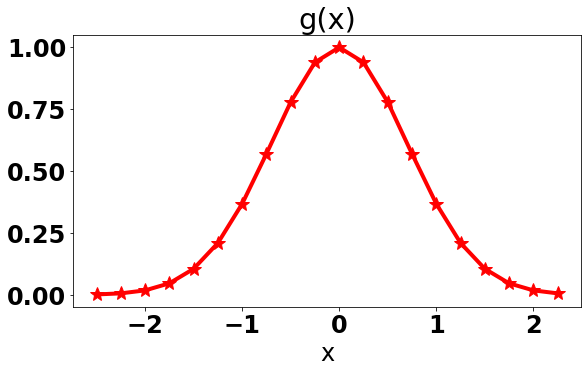

In [ ]:
 M=20
 N=M;
 L=5 # Definir las unidades
 dx2=L/M
 x2 = np.arange(-L/2,L/2,dx2) # Sistema de coordenadas en el plano espacial
f2 = np.exp(-(x2)**2) # función de prueba
FN=1/(2*dx2)

print(x2)
print('Con estos parametros el valor de la frecuencia de Nyquist es %.2f 1/m ' % FN)

font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 20, 5 # para modificar el tamaño de la figura
fig2 = plt.figure(2)

ax2 = plt.subplot(1,2,2)
ax2.plot(x2,f2,lw=4,color='r',marker='*',ms=15)
plt.title('g(x)')
plt.xlabel('x')
plt.show()



*   sistema de coordenadas en el espacio de frecuencias


In [ ]:
F = np.arange(-1/(2*dx2),1/(2*dx2),1/(L)) # Espacio coordenado de frecuencias
print(F)

[-2.0000000e+00 -1.8000000e+00 -1.6000000e+00 -1.4000000e+00
 -1.2000000e+00 -1.0000000e+00 -8.0000000e-01 -6.0000000e-01
 -4.0000000e-01 -2.0000000e-01 -4.4408921e-16  2.0000000e-01
  4.0000000e-01  6.0000000e-01  8.0000000e-01  1.0000000e+00
  1.2000000e+00  1.4000000e+00  1.6000000e+00  1.8000000e+00]




*  Shifting

¡PRECAUCIÓN! centrado y shift de funciones  para aplicar la FFT
La DFT en realidad es hecha usando un algorítmo conocido como FFT. Dicho algoritmo lee la información en un orden distinto esperando que la coordenada cero de la función $f(x)$ esté desplazado hacia la primera casilla del vector. Esto en algunas ocasiones puede generar errores, por lo que hay que tener precaución y usar un comando que organiza la información ya sea para la visualización o para el procesamiento con la FFT. En el caso de python es la rutina fft.fftshift.

Primero identifiquemos qué hace la función shift para preparar la función antes de aplicar la fft



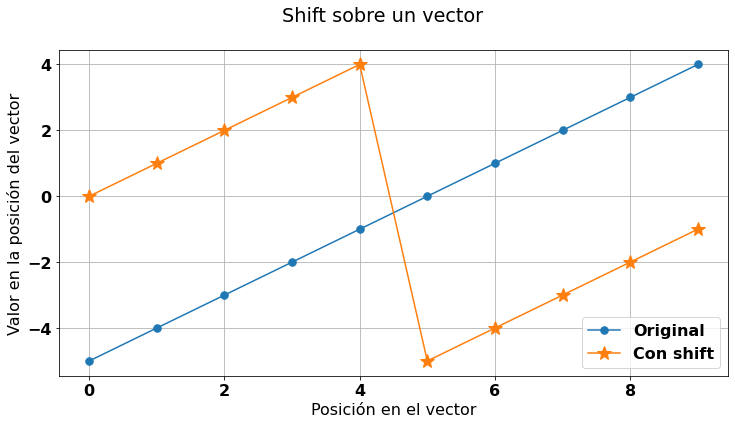

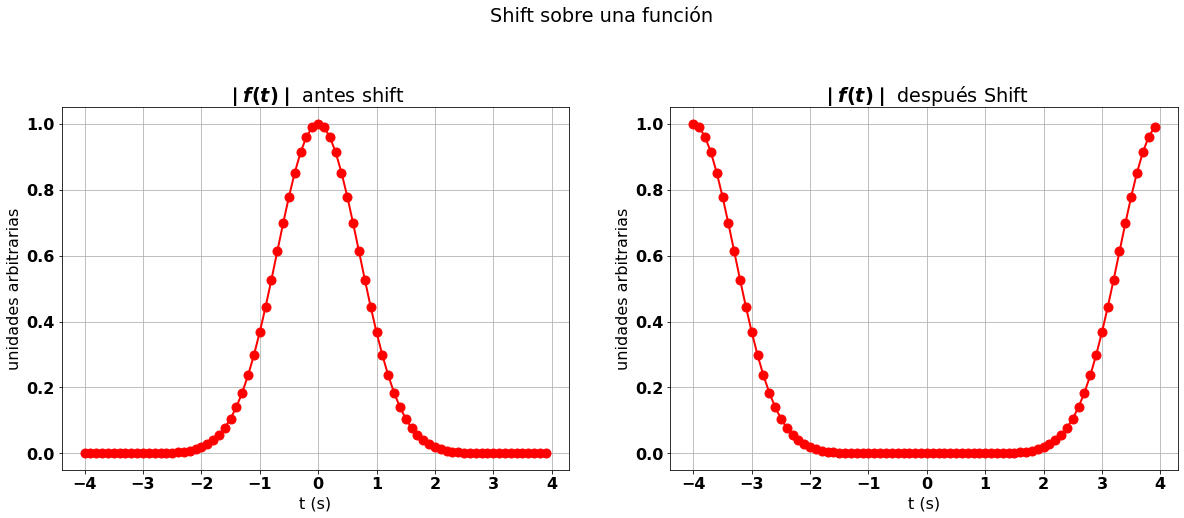

In [ ]:
dt = 0.1 #muestreo fino para simulación de continuo, segundos

font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)
A = np.arange(-5,5,1)
B = np.fft.fftshift(A)

fig1=plt.figure(figsize=(12,6))
fig1.suptitle('Shift sobre un vector')
plt.plot(A,marker='.',ms=15,label='Original')
plt.plot(B,marker='*',ms=15,label='Con shift')
plt.grid()
plt.xlabel('Posición en el vector')
plt.ylabel('Valor en la posición del vector')
plt.legend(loc=4)
plt.show()

font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,14))
fig.suptitle('Shift sobre una función')
fig.subplots_adjust(hspace=.1)
t = np.arange(-4,4,dt) # Rango temporal
ft = np.exp(-(t)**2)*np.exp(1j*2.*np.pi*t) # Función señal

# Gráfica amplitud de la función señal
ax1 = plt.subplot(2,2,1)
ax1.plot(t,abs(ft),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$ antes shift')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()

# Gráfica fase de la función señal
plt.subplot(2,2,2)
plt.plot(t,abs(np.fft.fftshift(ft)),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$ después Shift')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
#plt.gca().invert_xaxis()
plt.grid()


**Ejemplo:** Ahora analicemos lo que con la FFT en frecuencias, si se aplica correcta o incorrectamente el shift.

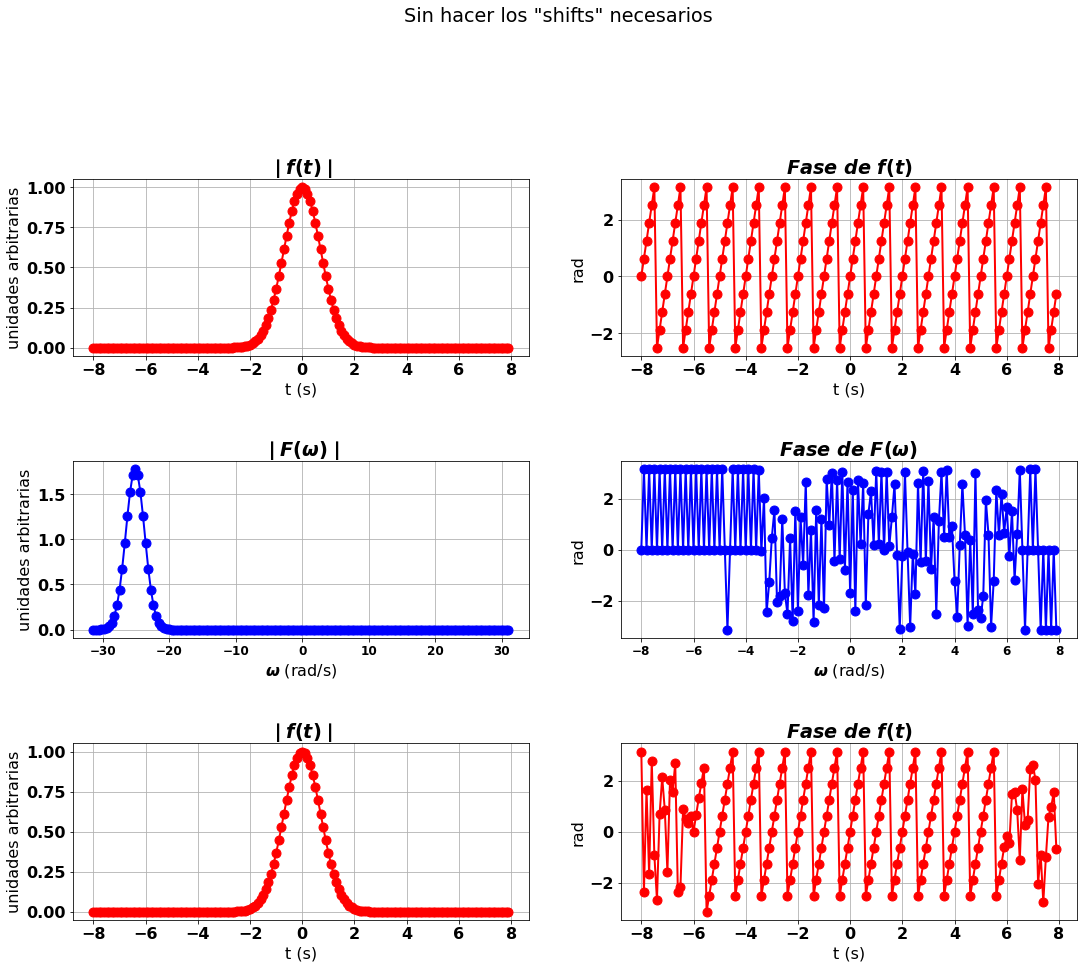

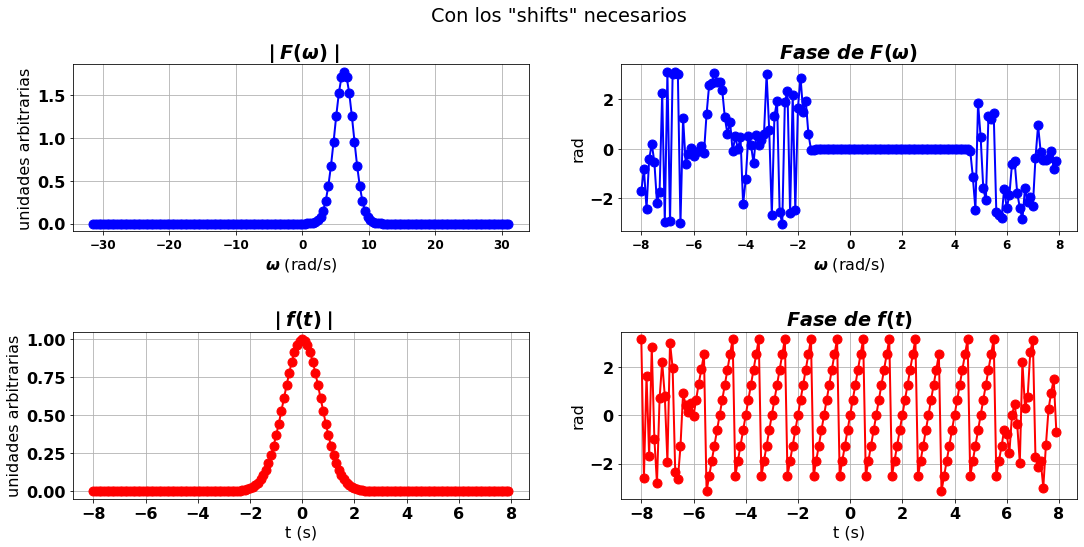

In [ ]:
font = {'weight' : 'bold', 'size'   : 16}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(18,24))
fig.suptitle('Sin hacer los "shifts" necesarios')
fig.subplots_adjust(hspace=.6)
t = np.arange(-8,8,dt) # Rango temporal
ft = np.exp(-(t)**2)*np.exp(1j*2.*np.pi*t) # Función señal

# Gráfica amplitud de la función señal
ax1 = plt.subplot(5,2,1)
ax1.plot(t,abs(ft),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()

# Gráfica fase de la función señal
ft_ang = np.angle(ft) #fase
plt.subplot(5,2,2)
plt.plot(t,ft_ang,marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()

fw = np.fft.fft(ft)*dt
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))
ax2 = plt.subplot(5,2,3)
ax2.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('unidades arbitrarias')
plt.xticks(fontsize=12)
plt.grid()

fw_ang = np.angle(fw)
plt.subplot(5,2,4)
plt.plot(t,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')
plt.xticks(fontsize=12)
plt.grid()

ft2 = np.fft.ifft(fw)*(1/dt)
plt.subplot(5,2,5)
plt.plot(t,abs(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()


plt.subplot(5,2,6)
plt.plot(t,np.angle(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()


fig = plt.figure(figsize=(18,8))
fig.suptitle('Con los "shifts" necesarios')
fig.subplots_adjust(hspace=.6)


fw = np.fft.fftshift(np.fft.fft(np.fft.fftshift(ft)))*dt
w = 2*np.pi*np.arange(-1/(2*dt),1/(2*dt),1/(dt*t.size))

ax2 = plt.subplot(2,2,1)
ax2.plot(w,abs(fw),marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$\mid F(\omega) \mid$')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('unidades arbitrarias')
plt.xticks(fontsize=12)
plt.grid()

fw_ang = np.angle(fw)
plt.subplot(2,2,2)
plt.plot(t,fw_ang,marker='.',color='blue',linewidth=2,markersize=18)
plt.title('$Fase \ de \ F(\omega) $')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('rad')
plt.xticks(fontsize=12)
plt.grid()

ft2 = np.fft.fftshift(np.fft.ifft(np.fft.fftshift(fw)))*(1/dt)
plt.subplot(2,2,3)
plt.plot(t,abs(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$\mid f(t) \mid$')
plt.xlabel('t (s)')
plt.ylabel('unidades arbitrarias')
plt.grid()


plt.subplot(2,2,4)
plt.plot(t,np.angle(ft2),marker='.',color='red',linewidth=2,markersize=18)
plt.title('$Fase \ de \ f(t)$')
plt.xlabel('t (s)')
plt.ylabel('rad')
plt.grid()

Convoluvión periódica

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


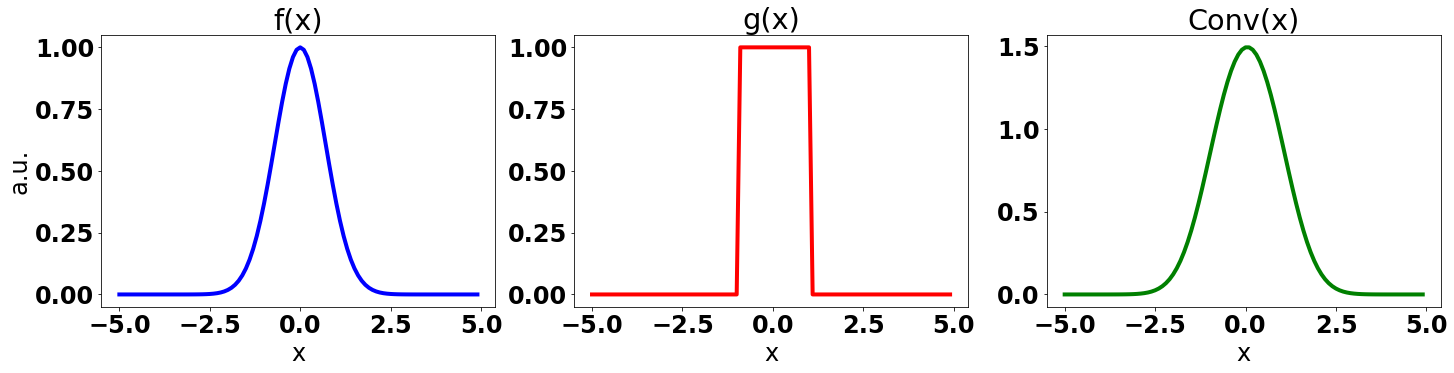

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


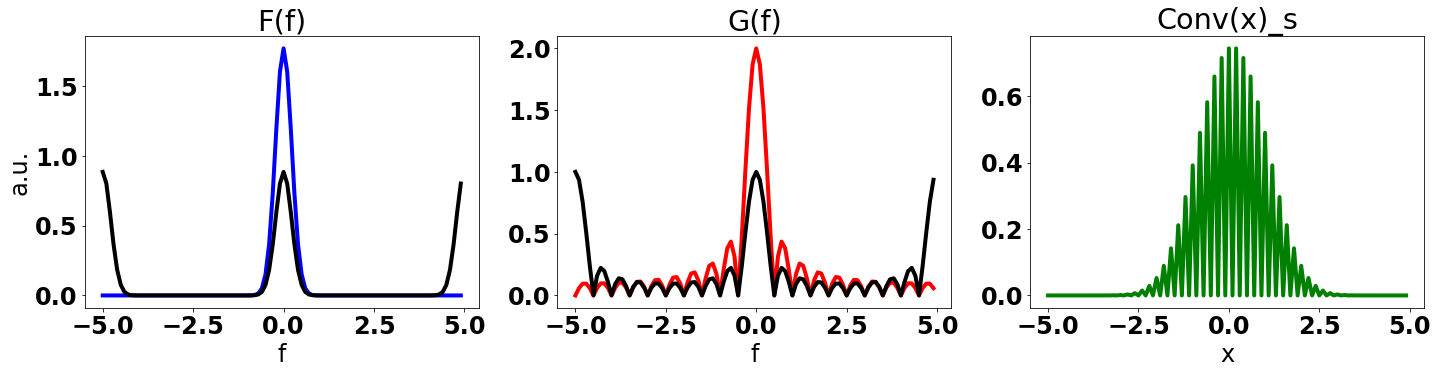

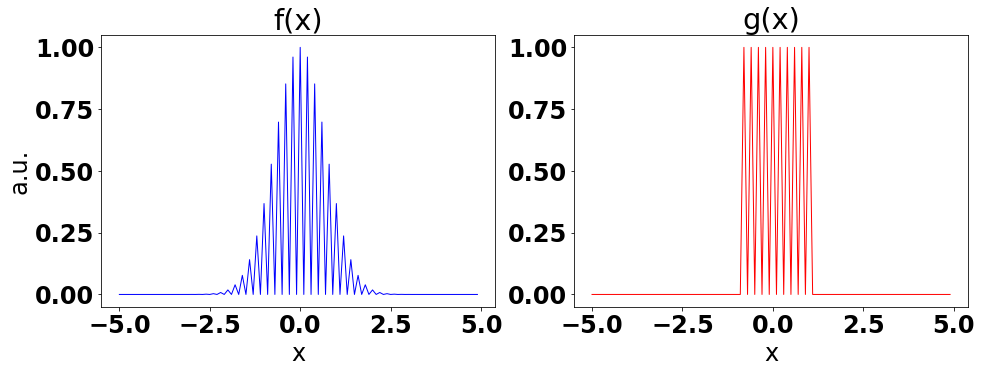

In [ ]:
dx=0.1
x = np.arange(-5,5,dx) # rango de visualización
f = np.exp(-(x)**2) # función de prueba

# Función muestreada
##############################
dxs = 0.3 # Valor a modificar
##############################
gauss_s = np.zeros(f.size)
for n2 in np.arange(0,f.size,int(dxs/dx)):
    gauss_s[n2] = f[n2] 


g = np.zeros(x.size)
for cont in range(len(x)):
    if abs(x[cont]) < 1:
        g[cont] = 1.
    else:
        g[cont] = 0.

g_s = np.zeros(g.size)
for n2 in np.arange(0,g.size,int(dxs/dx)):
    g_s[n2] = g[n2] 

font = {'weight' : 'bold', 'size'   : 24}
matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = 24, 5 # para modificar el tamaño de la figura
fig4 = plt.figure(4)
ax1 = plt.subplot(1,3,1)
ax1.plot(x,f,lw=4,color='b')
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('a.u.')

ax2 = plt.subplot(1,3,2)
ax2.plot(x,g,lw=4,color='r')
plt.title('g(x)')
plt.xlabel('x')

##### Transformadas de Fourier

Ff = np.fft.fftshift(np.fft.fft(np.fft.fftshift(f)))*dx
Ff_s = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss_s)))*dx
Gf = np.fft.fftshift(np.fft.fft(np.fft.fftshift(g)))*dx
Gf_s = np.fft.fftshift(np.fft.fft(np.fft.fftshift(g_s)))*dx

i_f=np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Ff_s)))*1/dx
i_g=np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Gf_s)))*1/dx

fc = np.arange(-1/(2*dx),1/(2*dx),1/(dx*x.size))

Conv=np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Ff*Gf)))*1/dx
Conv_s=np.fft.fftshift(np.fft.ifft(np.fft.fftshift(Ff_s*Gf_s)))*1/dx

ax3 = plt.subplot(1,3,3)
ax3.plot(x,(Conv),lw=4,color='g')
plt.title('Conv(x)')
plt.xlabel('x')
plt.show()

ax1 = plt.subplot(1,3,1)
ax1.plot(fc,abs(Ff),lw=4,color='b')
plt.title('F(f)')
plt.xlabel('f')
plt.ylabel('a.u.')

ax1 = plt.subplot(1,3,1)
ax1.plot(fc,abs(Ff_s),lw=4,color='k')
plt.title('F(f)')
plt.xlabel('f')

ax2 = plt.subplot(1,3,2)
ax2.plot(fc,abs(Gf),lw=4,color='r')
plt.title('g(x)')
plt.xlabel('x')

ax2 = plt.subplot(1,3,2)
ax2.plot(fc,abs(Gf_s),lw=4,color='k')
plt.title('G(f)')
plt.xlabel('f')

ax3 = plt.subplot(1,3,3)
ax3.plot(x,(Conv_s),lw=4,color='g')
plt.title('Conv(x)_s')
plt.xlabel('x')

plt.show()

ax1 = plt.subplot(1,3,1)
ax1.plot(x,abs(i_f),lw=1,color='b')
plt.title('f(x)')
plt.xlabel('x')
plt.ylabel('a.u.')

ax2 = plt.subplot(1,3,2)
ax2.plot(x,abs(i_g),lw=1,color='r')
plt.title('g(x)')
plt.xlabel('x')

plt.show()

#print(abs(Conv))